In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm


In [28]:
#### Parameters

eps = 0.5
delta = 0.5
K = 5
m = 300
n = 300
sigma = 0.1
sens = [2,1]

In [36]:
#### Functions

def data_moons(n,sigma):
    X, y = make_moons(n_samples=n,noise=sigma)
    y = 2*y-1

    return X, y

def privatizer(x, eps, delta):
    n = len(x)
    z = np.zeros((n, 2))
    for i in range(n):
        z[i,0] = x[i,0] + np.random.normal(0, np.sqrt(2*np.log(1.25/delta))*sens[0]/eps)
        z[i,1] = x[i,1] + np.random.normal(0, np.sqrt(2*np.log(1.25/delta))*sens[1]/eps)
    return z


def figures(n, sigma, eps, delta):
    label = [0]*n
    X, y = data_moons(n,sigma)
    for i in range(n):
        label[i] = int((y[i]+1)/2)
    colors = np.array(['blue','red'])
    plt.subplot(211)
    plt.scatter(X[:,0], X[:,1], s=40, c=colors[label],edgecolors='black')
    plt.subplot(212)
    Z = privatizer(X, eps, delta)
    plt.scatter(Z[:,0], Z[:,1], s=40, c=colors[label],edgecolors='black')
    plt.set_cmap('bwr')
    plt.show()

    return X, y, label, Z


def dist_l2(Z,y):
    Z1 = np.array([Z[i].tolist() for i in range(len(Z)) if y[i]==1])
    Z2 = np.array([Z[i].tolist() for i in range(len(Z)) if y[i]==-1])
    return np.sqrt(norm(Z1-Z2))


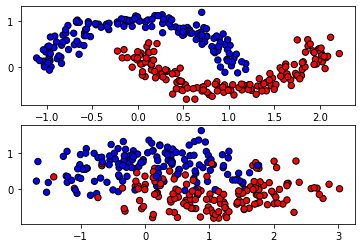

In [17]:
#### Data simulation


X, y, label, Z = figures(300, 0.1, 10, 0.1)

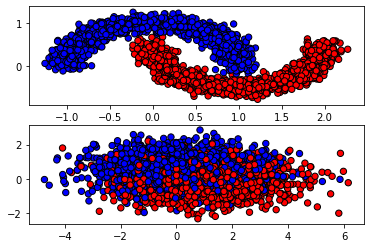

In [46]:
### distance between two moons after DP
eps = 1
delta = 1
K = 5
m = 300
n = 300
sigma = 0.1
sens = [2,1]

X, y, label, Z = figures(n*10, sigma, eps, delta)
dist_priv = dist_l2(Z, y)
dist_init = dist_l2(X, y)

In [47]:
print(dist_init, dist_priv)

8.12253616023635 10.219623937265911
